# Практика 6
Корешков

```
Александр, [16.10.2023 11:20]
За допомогою інтерполяції обчислити f(x) та оцінити похибку, якщо
1) Корешков Михайло   f(x)=e^(x+1/2)/ln(x+1) в т. x=-0.7
x_i   -0.8                 -0.6                -0.4 
f(x_i)   -0.4603     -0.9875     -2.1635 

Александр, [16.10.2023 11:28]
Побудувати на проміжку [a,b] многочлен Чебишева шостого степеня з коефіцієнтом с при старшому степені. Обчислити її відхилення від 0,
i oцінити похибку інтерполяції функції f(x) на [a,b] многочленом шостого степеня побудованим за вузлами. Функція та вузли з попередньої задачі.
1) Корешков Михайло   [a,b]=[-1,0], c=1
```

---

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from collections import namedtuple 

def _(*args): return np.array([*args])


## Завдання 1

In [2]:
xi = _(-0.8,  -0.6,  -0.4)
yi = _(-0.4603,  -0.9875,  -2.1635)
X0 = -0.7

def f(x): 
    return np.exp(x+(1/2))/np.log(x+1)

Я будуватиму інтерполяційний поліном у формі Лагранжа. Код взято з попереднього дз

In [3]:
def prepare_lagrange(xs, ys):
    n = len(xs)
    C = []
    for k in range(0, n):
        c_k = 1
        for i in range(0, n):
            if i == k:
                continue
            c_k *= (xs[k] - xs[i])
        C.append( ys[k] / c_k )
        
    return C

def evaluate_lagrange(C, xs, ys, x, eps=1e-4):
    # d = np.abs(xs - x)
    # di, dm = np.argmin(d), np.min(d)
    # if dm < eps:
    #     return ys[di]
    
    n = len(C)
    y = 0
    for k in range(0,n):
        dx = 1
        for i in range(0, n):
            if i==k:
                continue
            dx *= (x - xs[i])
        y += C[k] * dx
    
    return y

Обчислюємо $C_i$ та інтерполяційний поліном в точці $-0.7$

Також побудуємо графіки інтерполяційного полінома та дійсної функції

L(x) = -0.6428


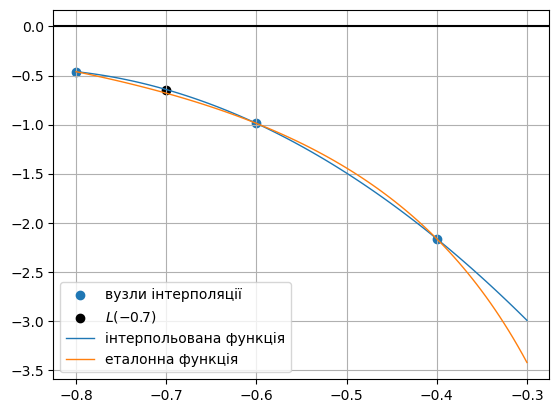

In [8]:
c1 = prepare_lagrange(xi, yi)

Y0 = evaluate_lagrange(c1, xi, yi, X0)
print(f"L(x) = {Y0}")


X = np.linspace(-0.8, -0.3, 100)

fx_interp = [evaluate_lagrange(c1, xi, yi, x) for x in X]
fx_true = f(X)

plt.scatter(xi, yi, label="вузли інтерполяції")
plt.scatter([X0], [Y0], label="$L(-0.7)$", c='black')
plt.plot(X, fx_interp, label="інтерпольована функція", lw=1)
plt.plot(X, fx_true, label="еталонна функція", lw=1)
plt.grid()
plt.axhline(0, c='k')
# plt.axvline(0, c='k')
plt.legend()

Маємо наближення 
$$L(-0.7) = -0.6428$$

In [10]:
y0_true = f(X0)
d,e = (Y0-y0_true), (Y0-y0_true)/y0_true
print(f"Абсолютна похибка {d:.5g}")
print(f"Відносна похибка {e*100:.5g}%")

Абсолютна похибка 0.037224
Відносна похибка -5.474%


Абсолютна похибка $0.037224$  
Відносна похибка $-5.474%$

## Завдання 2
```
Побудувати на проміжку [a,b] многочлен Чебишева шостого степеня з коефіцієнтом с при старшому степені. Обчислити її відхилення від 0,
i oцінити похибку інтерполяції функції f(x) на [a,b] многочленом шостого степеня побудованим за вузлами. Функція та вузли з попередньої задачі.
1) Корешков Михайло   [a,b]=[-1,0], c=1
```

Наступна функція рекурентно генерує ненормований поліном Чебишова, в якому виконано заміну $x$ на $2x/(b-a) - (b+a)/(b-a)$

In [34]:
from numpy.polynomial import Polynomial

def T(n, a, b):
    assert a<b
    T0 = Polynomial([1])   # 1
    T1 = Polynomial([-(b+a)/(b-a),2/(b-a)]) # x = 2y/(b-a) - (b+a)/(b-a)
    if n == 0: return T0
    if n == 1: return T1
    
    return 2*T1*T(n-1, a, b) - T(n-2, a, b)


In [35]:
A, B = -1, 0
T6 = T(6, A, B)
T6

Polynomial([1.000e+00, 7.200e+01, 8.400e+02, 3.584e+03, 6.912e+03, 6.144e+03,
       2.048e+03], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Нормуємо

In [40]:
1/(((B-A)**6) / (2**(2*6 - 1)))

2048.0

In [41]:
T6_1 = T6 * ((B-A)**6) / (2**(2*6 - 1))
T6_1

Polynomial([4.8828125e-04, 3.5156250e-02, 4.1015625e-01, 1.7500000e+00,
       3.3750000e+00, 3.0000000e+00, 1.0000000e+00], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Будуємо графік T6 та обчислюємо відхилення від 0

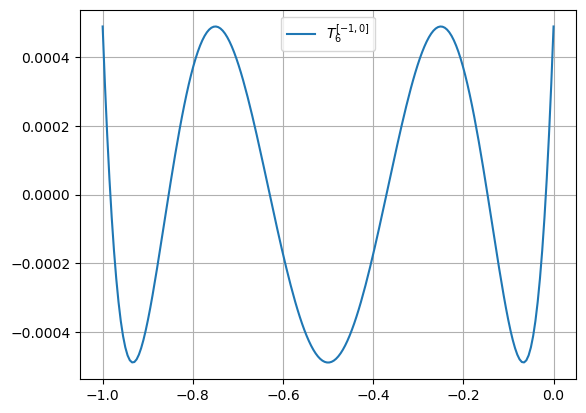

In [54]:
X = np.linspace(-1,0,200)
Tx = T6_1(X)

plt.plot(X, Tx, label="$T_6^{[-1,0]}$")
plt.grid()
plt.legend()

#### Максимальне відхилення многочлена Чебишова від нуля

In [57]:
theor = (B-A)**6/(2**(2*6 - 1))
pract = np.abs(Tx).max()

print(f"Теоретичне відхилення від нуля = {theor:.6g}")
print(f"Обчислене відхилення від нуля = {pract:.6g}")


Теоретичне відхилення від нуля = 0.000488281
Обчислене відхилення від нуля = 0.000488281


#### Оцінка похибки інтерполяції


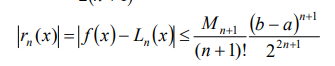

In [75]:
import sympy as sym

symx = sym.symbols('x')
symf = sym.exp(symx+(1/2))/sym.log(symx+1)
sym_fder6 = sym.diff(symf, symx, 6)

M6_1 = sym_fder6.subs(symx, -0.8)
M6_2 = sym_fder6.subs(symx, -0.6)
M6_3 = sym_fder6.subs(symx, -0.4)
print(f"f^(6)(-0.8) = {M6_1:.5g}")
print(f"f^(6)(-0.6) = {M6_2:.5g}")
print(f"f^(6)(-0.4) = {M6_3:.5g}")
print("Сама похідна:")
sym_fder6

f^(6)(-0.8) = 41213
f^(6)(-0.6) = -41548
f^(6)(-0.4) = -7.2445e+5
Сама похідна:


((24.7308190605019 + 49.4616381210038/log(x + 1))/((x + 1)**2*log(x + 1)) + 1.64872127070013 - 9.89232762420077/((x + 1)*log(x + 1)) - (65.9488508280051 + 197.846552484015/log(x + 1) + 197.846552484015/log(x + 1)**2)/((x + 1)**3*log(x + 1)) + (148.384914363012 + 544.078019331042/log(x + 1) + 890.309486178069/log(x + 1)**2 + 593.539657452046/log(x + 1)**3)/((x + 1)**4*log(x + 1)) - (237.415862980818 + 989.232762420077/log(x + 1) + 2077.38880108216/log(x + 1)**2 + 2374.15862980818/log(x + 1)**3 + 1187.07931490409/log(x + 1)**4)/((x + 1)**5*log(x + 1)) + (197.846552484015 + 903.49925634367/log(x + 1) + 2225.77371544517/log(x + 1)**2 + 3363.39139222826/log(x + 1)**3 + 2967.69828726023/log(x + 1)**4 + 1187.07931490409/log(x + 1)**5)/((x + 1)**6*log(x + 1)))*exp(x)/log(x + 1)

In [72]:
approx_dif = (np.abs(M6_3)/720) * theor 
approx_dif

0.491302186266359

$$|r_n(x)| \le \frac{M_6}{6!}|T_6^{[-1,0]}| \le \frac{7.2445\cdot 10^5}{720} \cdot 0.000488281 = 0.4913$$

---

### Chebyshev nodes

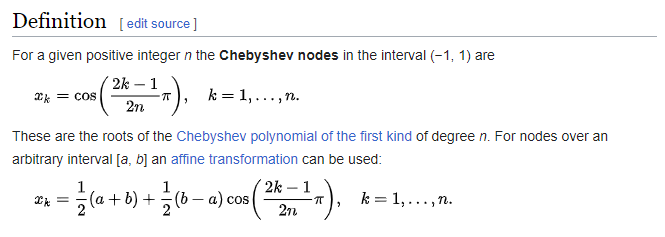

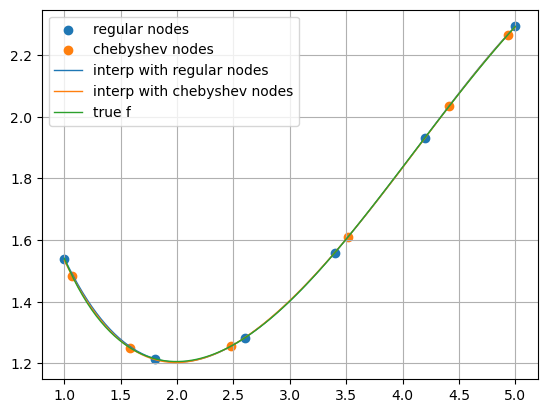

In [30]:
def get_chebyshev_nodes(n,a,b):
    return (a+b)/2 + ((b-a)/2)*np.cos(np.pi * (2*(np.arange(1,n+1))-1)/(2*n))

n = 6
a,b = 1, 5
f = lambda x: np.cos(x)/x + np.sqrt(x)

X = np.linspace(a,b,n)
TX = get_chebyshev_nodes(n,a,b)

Y = f(X)
TY = f(TX)

C = prepare_lagrange(X, Y)
TC = prepare_lagrange(TX, TY)

xx = np.linspace(a,b,100)
yy = [evaluate_lagrange(C, X, Y, x) for x in xx]
Tyy = [evaluate_lagrange(TC, TX, TY, x) for x in xx]

true_yy = f(xx)

plt.scatter(X, Y, label="regular nodes")
plt.scatter(TX, TY, label="chebyshev nodes")
plt.plot(xx, yy, lw=1, label="interp with regular nodes")
plt.plot(xx, Tyy, lw=1, label="interp with chebyshev nodes")
plt.plot(xx, true_yy, lw=1, label="true f")
plt.grid()
# plt.axhline(0, c='k')
# plt.axvline(0, c='k')
plt.legend()

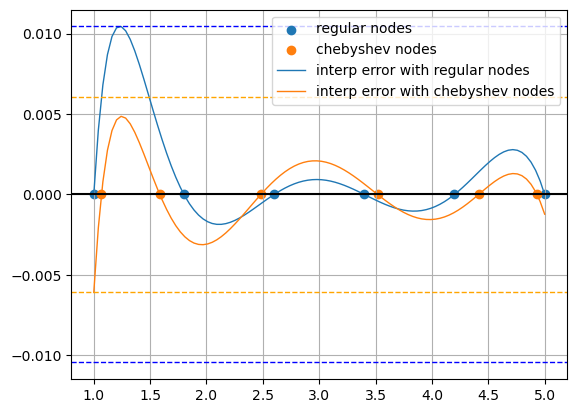

In [40]:
E = yy - true_yy
TE = Tyy - true_yy

plt.scatter(X, np.zeros_like(X), label="regular nodes")
plt.scatter(TX, np.zeros_like(TX), label="chebyshev nodes")
plt.plot(xx, E, lw=1, label="interp error with regular nodes")
plt.plot(xx, TE, lw=1, label="interp error with chebyshev nodes")
plt.grid()
plt.axhline(0, c='k')
plt.axhline(np.abs(E).max(), linestyle='--', c='b', lw=1)
plt.axhline(-np.abs(E).max(), linestyle='--', c='b', lw=1)
plt.axhline(np.abs(TE).max(), linestyle='--', c='orange', lw=1)
plt.axhline(-np.abs(TE).max(), linestyle='--', c='orange', lw=1)
# plt.axvline(0, c='k')
plt.legend()